<center><h1>Fundamentos Data Science parte 1</h1><center>
    Autor: Walther Becks

<h2>Desafío 1: Determinantes del ingreso</h2>

Usted trabaja para un organismo no gubernamental que está interesado en las dinámicas
socioeconómicas que determinan la desigualdad de ingreso y la erradicación de la pobreza
extrema, enmarcado dentro de los objetivos del desarrollo del nuevo milenio del Programa
de las Naciones Unidas para el Desarrollo.
Le encomiendan el desarrollo de un **modelo predictivo** sobre la **probabilidad que un
individuo presente salarios por sobre o bajo los 50.000 dólares anuales**, en base a una serie
de atributos sociodemográficos.

**Datos Asociados: income-db.csv**

## Hito 1: Análisis Preliminar del problema

* Se pide desarrollar un modelo predictivo, se entiende que aproximará al problema través de Machine Learning.
* La variable del vector objetivo es categórica binarizada, y nos solicitan la ocurrencia de esta. Esto hace que el problema de clasificación.

**Librerías a utilizar:** 

1. pandas == 1.2.0
2. numpy == 1.20.3
3. scipy == 1.7.3  
4. matplotlib == 3.0.3
5. seaborn == 0.11.2 
6. statsmodels == 0.13.2
7. conda == 4.8.3
8. python == 3.7.3
9. missingno == 0.5.1

-----------

## Hito 2

### Importe de librerías

In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import missingno
sns.set_style('darkgrid')

import statsmodels.api as sm
import statsmodels.formula.api as smf

warnings.filterwarnings('ignore')

#para dsps:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,confusion_matrix,accuracy_score,precision_score, recall_score,roc_curve,roc_auc_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

import functions_final
plt.style.use('seaborn') # gráficos estilo seaborn
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams["figure.dpi"] = 200
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

<hr>

### Importe de datos

In [36]:
df = pd.read_csv('income-db.csv')
print(f"Tenemos {df.shape[0]} filas y {df.shape[1]} columnas")
df.head()

Tenemos 48842 filas y 15 columnas


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


<hr>

### Limpieza de base de datos

#### Valores nulos

In [37]:
df = df.replace(to_replace='?',value= np.nan)
df.apply(lambda x: f"{round((x[x.isna()].shape[0]/x.shape[0])*100, 2)}%").sort_values(ascending = False).to_frame().rename(columns = {0:'% nulos'})

,% nulos
occupation,5.75%
workclass,5.73%
native-country,1.75%
age,0.0%
fnlwgt,0.0%
education,0.0%
educational-num,0.0%
marital-status,0.0%
relationship,0.0%
race,0.0%


<hr>

In [89]:
df_droped_na = df.dropna()
print(f"Se limpió la base de valores nulos, con lo que se consiguió conservar un {round(df_droped_na.shape[0]/df.shape[0]*100)}% de los datos que son {df_droped_na.shape[0]} , se perdieron {df.shape[0]-df_droped_na.shape[0]} filas.")

Se limpió la base de valores nulos, con lo que se consiguió conservar un 93% de los datos que son 45222 , se perdieron 3620 filas.


#### Recodificación de las variables

1. Utilizando el importe de functions, recodificaremos y binarizaremos las variables
2. Normalizaremos las varibles numéricas (excepto las binarias).

In [106]:

df_recodificacion = functions_final.recodificaciones(df_droped_na)
df_bin = pd.get_dummies(df_recodificacion, drop_first = True)
df_bin.columns = [i.replace('-','_').replace('>', 'more_than_') for i in df_bin.columns]
print("Finalmente se procedió a reemplazar los guiones y signos no compatibles con las librerías de machine learning")
df_bin.columns.to_list()

df_norm = df_bin.select_dtypes('int64').apply(lambda x: (x - x.mean())/x.std()).join(df_bin.select_dtypes('uint8'))
print(f"**De las {df_recodificacion.shape[1]} columnas originales, filas: {df_recodificacion.shape[0]}  se procedió a agregar {df_bin.shape[1]-df_recodificacion.shape[1]} columnas binarias, dejando un total {df_bin.shape[1]} columnas**")

df_norm.head()

Finalmente se procedió a reemplazar los guiones y signos no compatibles con las librerías de machine learning
**De las 15 columnas originales, filas: 45222  se procedió a agregar 18 columnas binarias, dejando un total 33 columnas**


,age,fnlwgt,educational_num,capital_gain,capital_loss,hours_per_week,relationship_Not_in_family,relationship_Other_relative,relationship_Own_child,relationship_Unmarried,relationship_Wife,race_Asian_Pac_Islander,race_Black,race_Other,race_White,gender_Male,income_more_than_50K,collars_others,collars_white_collar,workclass_recod_private,workclass_recod_self_employed,workclass_recod_state_level_gov,workclass_recod_unemployed,educ_recod_elementary_school,educ_recod_high_school,educ_recod_preschool,educ_recod_university,civstatus_married,civstatus_never_married,civstatus_separated,civstatus_widowed,region_asia,region_europa
0,-1.024972,0.350886,-1.221545,-0.146732,-0.218778,-0.078119,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
1,-0.041455,-0.945868,-0.438117,-0.146732,-0.218778,0.754693,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
2,-0.798006,1.393576,0.737026,-0.146732,-0.218778,-0.078119,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,0.412476,-0.278417,-0.046402,0.877457,-0.218778,-0.078119,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
5,-0.344075,0.084801,-1.613260,-0.146732,-0.218778,-0.910931,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0


### Inspección de variables

#### Variables categóricas

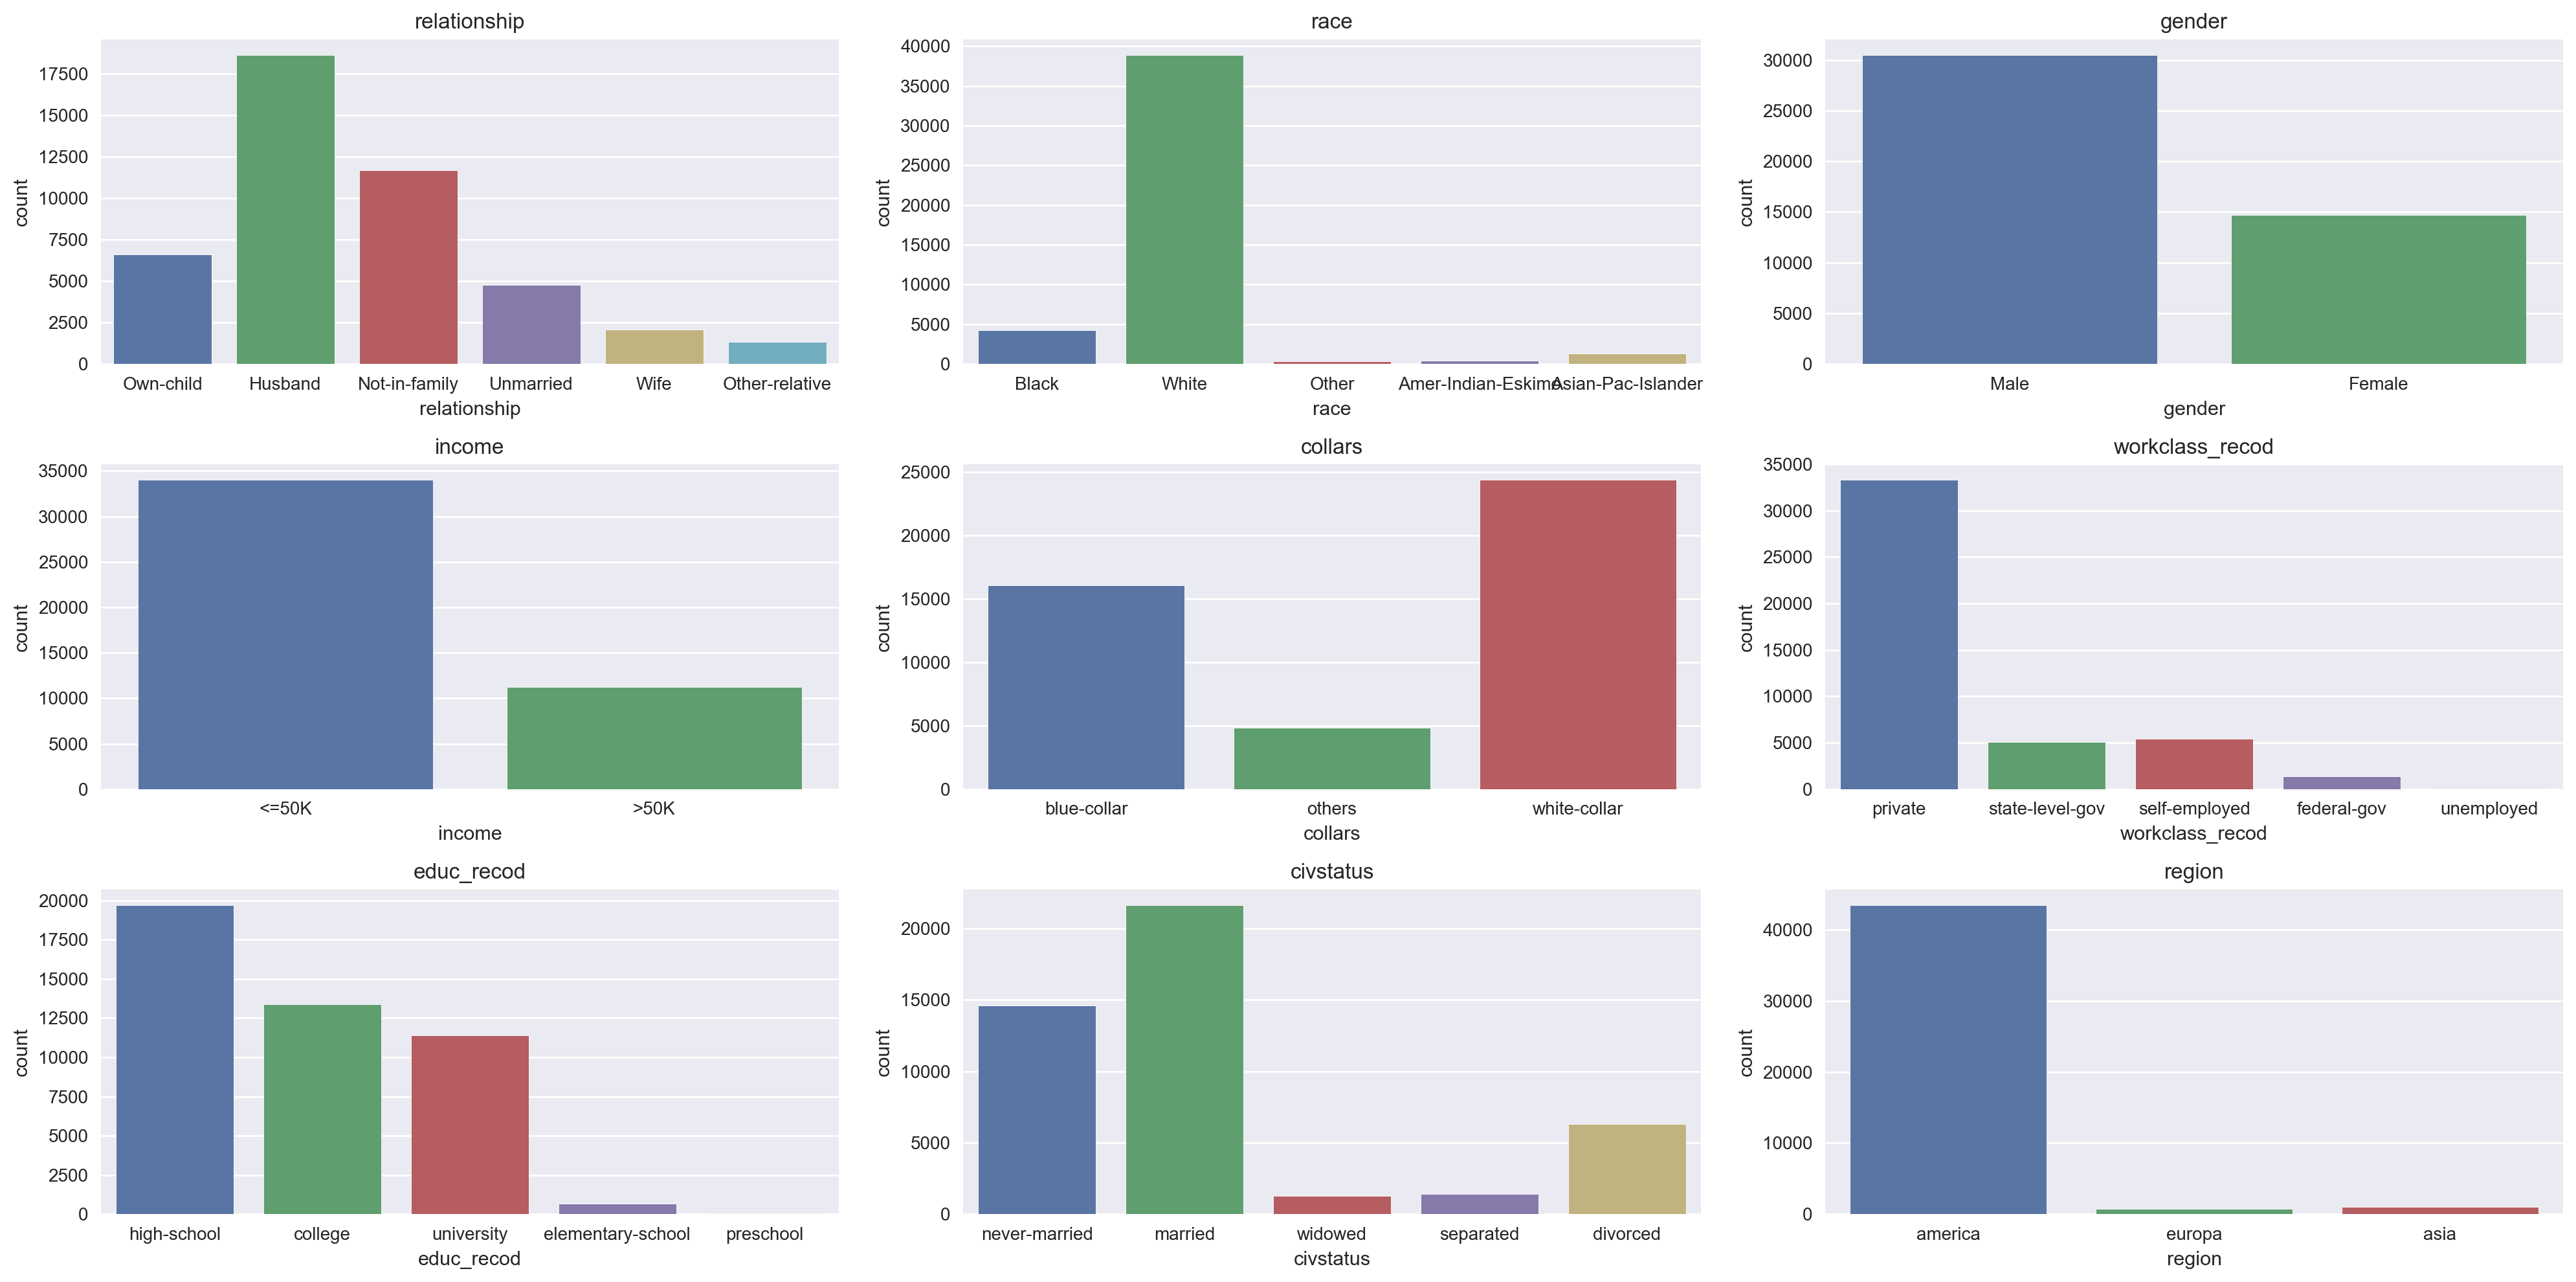

In [41]:
plt.figure(figsize = (20,10))
for i, column in enumerate(df_recodificacion.select_dtypes('O').columns):
    
    plt.subplot(3,3,i+1)
    plt.title(column)
    sns.countplot(df_recodificacion[column])
plt.tight_layout()

- Podemos observar que la muestra está sesgada por una predominancia de observaciones del continente americano, del sector privado y de raza blanca. Finalmente, el vector objetivo está sesgado en la muestra también, inclinandose por personas que ganan más de 50 mil USD.

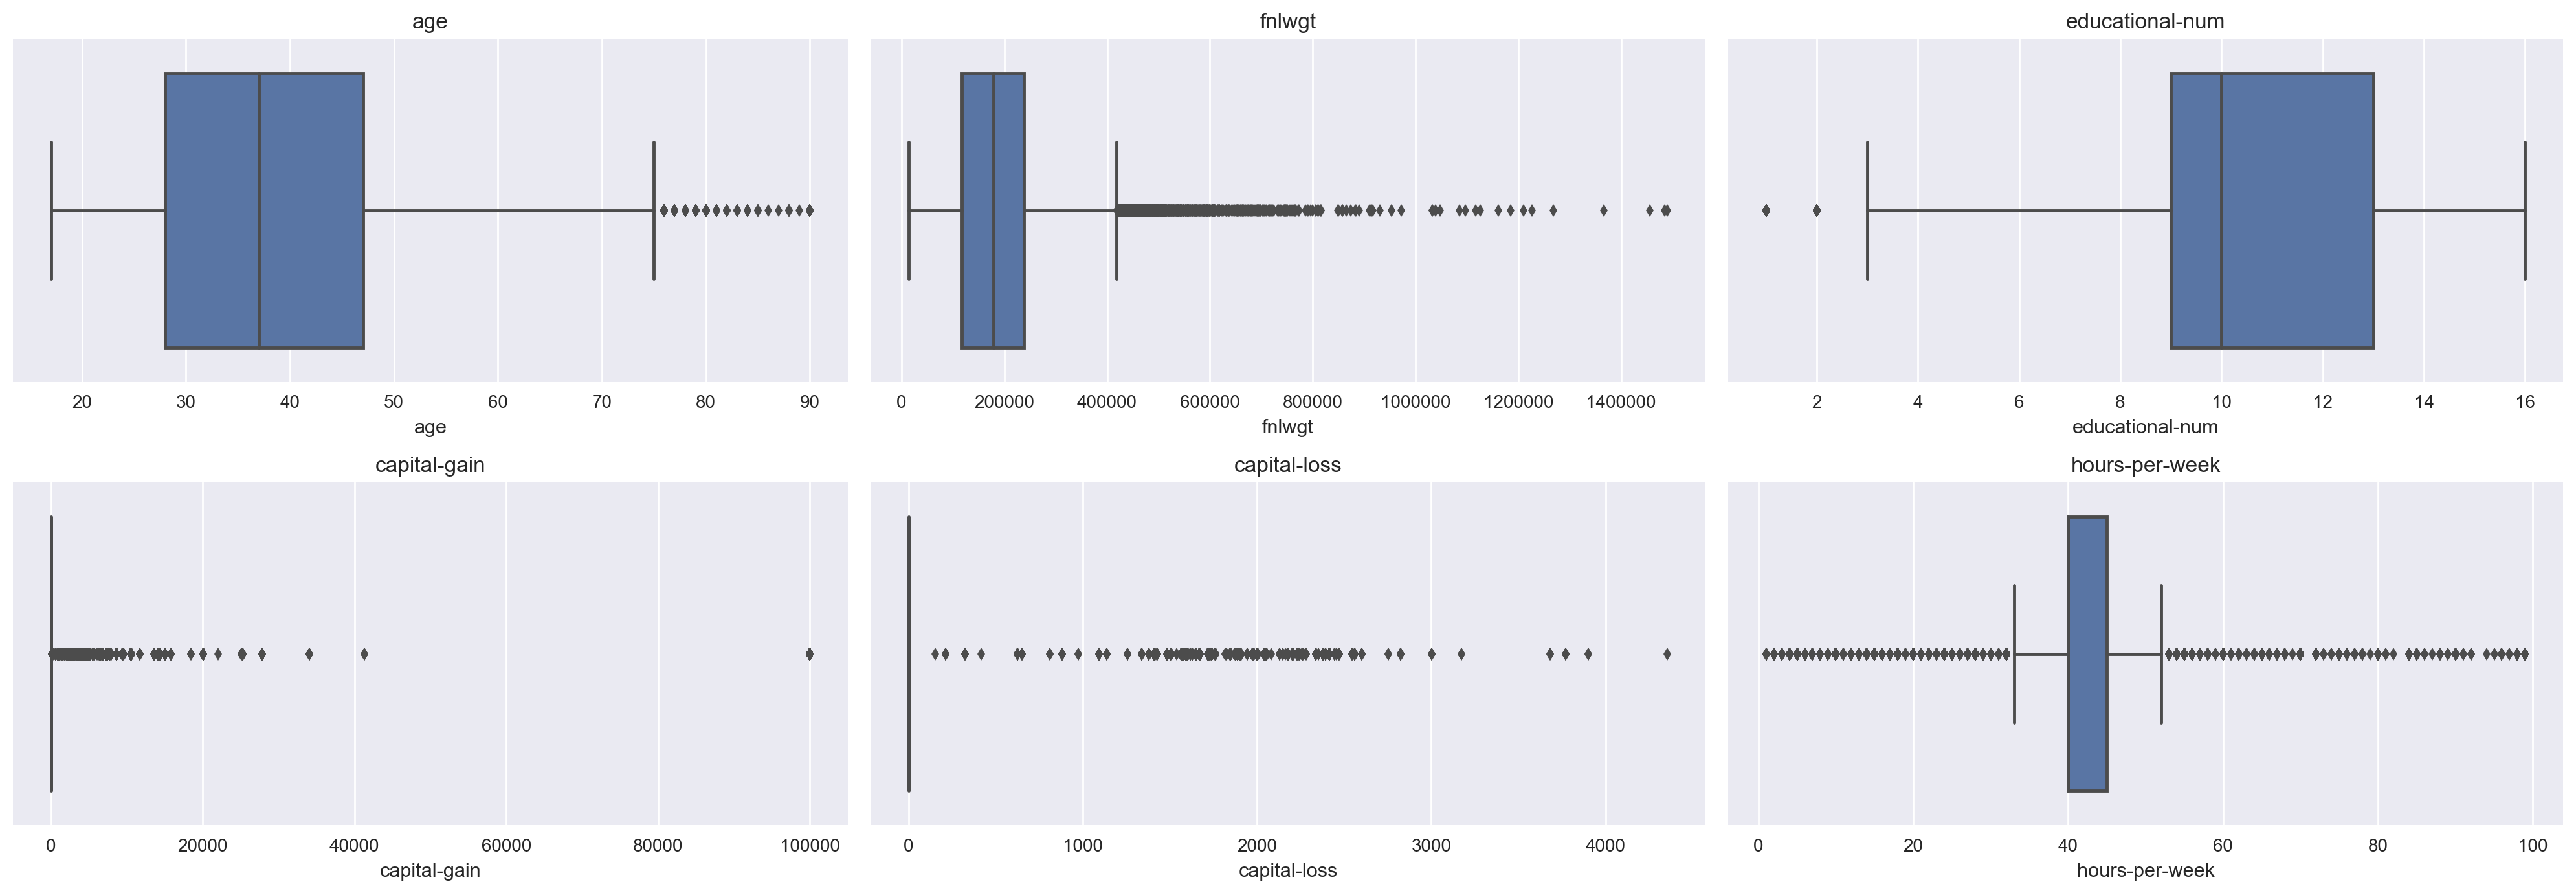

In [42]:
plt.figure(figsize = (20,10))
for i, column in enumerate(df_recodificacion.select_dtypes('int64').columns):
    plt.subplot(3,3,i+1)
    plt.title(column)
    sns.boxplot(df_recodificacion[column])
plt.tight_layout()

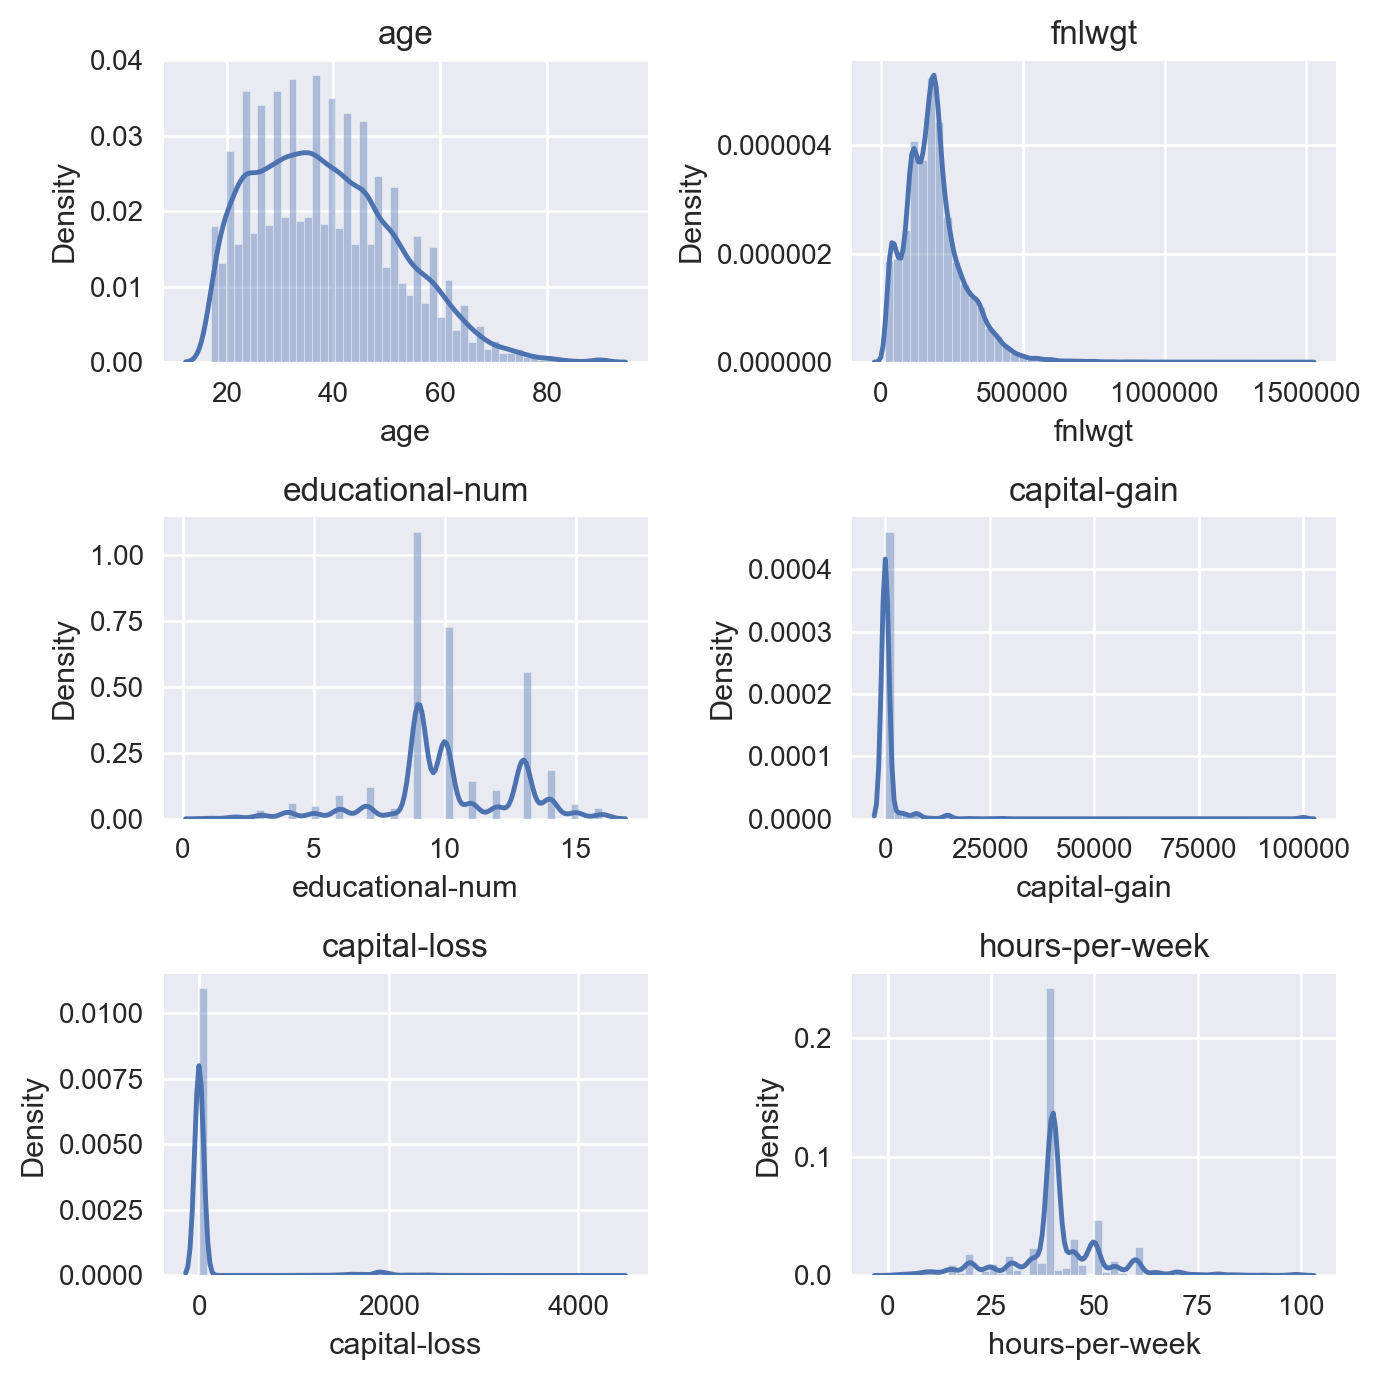

In [43]:
plt.figure(figsize = (7,7))
for i, column in enumerate(df_recodificacion.select_dtypes('int64').columns):
    
    plt.subplot(3,2,i+1)
    plt.title(column)
    sns.distplot(df_recodificacion[column])
plt.tight_layout()

- En los datos númericos encontramos gran variabilidad, las variables capital-gain y capital-loss parecen estar concentradas en cero.
- La variable hours-per-week muestra una alta concentracion entorno a una media de 40 horas semanales, que se asemeja a una distribución normal. 
- La variable educational-num muestra 3 tipos de modas. 

In [44]:
df_norm.corr()['income_more_than_50K'].to_frame().assign(absolute = df_norm.corr()['income_more_than_50K'].abs()).sort_values(by='absolute', ascending = False).drop('absolute',axis=1)[1:]

,income_more_than_50K
civstatus_married,0.437678
educational_num,0.332800
educ_recod_university,0.322283
civstatus_never_married,-0.319536
age,0.237040
hours_per_week,0.227199
educ_recod_high_school,-0.223086
relationship_Own_child,-0.222635
collars_white_collar,0.221459
capital_gain,0.221034


- Existe una correlacion del vector objetivo con factores tales como: estado civil, nivel educacional, edad, horas semanales trabajadas.
- Dejaremos estas observaciones en espera, por continuar con la modelacion mediante regresión lineal.

### Modelo Saturado de regresión lineal

In [108]:
modelo_1_ols = smf.ols(f" income_more_than_50K ~ {' + '.join(df_norm.drop(['income_more_than_50K'], axis = 1).columns.tolist())}", df_norm).fit()
print("Nuestro modelo de regresión lineal indica un R-squared de 35.5% lo que indica su capacidad explicativa de los regresores sobre el vector objetivo")
modelo_1_ols.summary()


Nuestro modelo de regresión lineal indica un R-squared de 35.5% lo que indica su capacidad explicativa de los regresores sobre el vector objetivo


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     income_more_than_50K   R-squared:                       0.355
Model:                              OLS   Adj. R-squared:                  0.354
Method:                   Least Squares   F-statistic:                     776.0
Date:                  Sun, 29 May 2022   Prob (F-statistic):               0.00
Time:                          17:24:04   Log-Likelihood:                -16283.
No. Observations:                 45222   AIC:                         3.263e+04
Df Residuals:                     45189   BIC:                         3.292e+04
Df Model:                            32                                         
Covariance Type:              nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           0.2511      0.024     10.541      0.000       0.204       0.298
age                                 0.0383      0.002     18.336      0.000       0.034       0.042
fnlwgt                              0.0082      0.002      4.923      0.000       0.005       0.011
educational_num                     0.0684      0.004     17.450      0.000       0.061       0.076
capital_gain                        0.0617      0.002     37.089      0.000       0.058       0.065
capital_loss                        0.0386      0.002     23.434      0.000       0.035       0.042
hours_per_week                      0.0363      0.002     20.342      0.000       0.033       0.040
relationship_Not_in_family         -0.2277      0.013    -17.958      0.000      -0.253      -0.203
relationship_Other_relative        -0.1996      0.014    -13.898      0.000      -0.228      -0.171
relationship_Own_child             -0.1980      0.013    -14.981      0.000      -0.224      -0.172
relationship_Unmarried             -0.2185      0.014    -16.103      0.000      -0.245      -0.192
relationship_Wife                   0.1011      0.009     10.896      0.000       0.083       0.119
race_Asian_Pac_Islander             0.0474      0.022      2.133      0.033       0.004       0.091
race_Black                          0.0204      0.018      1.161      0.246      -0.014       0.055
race_Other                          0.0140      0.025      0.560      0.576      -0.035       0.063
race_White                          0.0419      0.017      2.495      0.013       0.009       0.075
gender_Male                         0.0687      0.005     14.119      0.000       0.059       0.078
collars_others                      0.0247      0.006      4.116      0.000       0.013       0.036
collars_white_collar                0.0956      0.004     22.667      0.000       0.087       0.104
workclass_recod_private            -0.0670      0.010     -7.011      0.000      -0.086      -0.048
workclass_recod_self_employed      -0.1026      0.010     -9.775      0.000      -0.123      -0.082
workclass_recod_state_level_gov    -0.0858      0.011     -8.159      0.000      -0.106      -0.065
workclass_recod_unemployed         -0.1786      0.076     -2.338      0.019      -0.328      -0.029
educ_recod_elementary_school        0.0301      0.018      1.663      0.096      -0.005       0.066
educ_recod_high_school             -0.0132      0.005     -2.605      0.009      -0.023      -0.003
educ_recod_preschool                0.1200      0.043      2.762      0.006       0.035       0.205
educ_recod_university               0.0746      0.007     11.397      0.000       0.062       0.087
civstatus_married                   0.0636      0.013      4.

In [107]:
functions_final.custom_ols(df_bin,"income_more_than_50K",0.05)

{'pseudo_r2': 0.0,
 'data':                            regresor          coef   pval
 1                         Intercept -2.875000e-01  0.000
 21    workclass_recod_self_employed -1.026000e-01  0.000
 20          workclass_recod_private -6.700000e-02  0.000
 19             collars_white_collar  9.560000e-02  0.000
 18                   collars_others  2.470000e-02  0.000
 17                      gender_Male  6.870000e-02  0.000
 27            educ_recod_university  7.460000e-02  0.000
 28                civstatus_married  6.360000e-02  0.000
 12                relationship_Wife  1.011000e-01  0.000
 22  workclass_recod_state_level_gov -8.580000e-02  0.000
 11           relationship_Unmarried -2.185000e-01  0.000
 9       relationship_Other_relative -1.996000e-01  0.000
 8        relationship_Not_in_family -2.277000e-01  0.000
 7                    hours_per_week  3.000000e-03  0.000
 6                      capital_loss  9.533000e-05  0.000
 5                      capital_gain  8.21700

### Método de mínimos cuadrados (logit) para variable dependiente

In [46]:
modelo_1 = smf.logit(f" income_more_than_50K ~ {' + '.join(df_norm.drop(['income_more_than_50K'], axis = 1).columns.tolist())}", df_norm).fit()
modelo_1.summary()


Optimization terminated successfully.
         Current function value: 0.331645
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                            
================================================================================
Dep. Variable:     income_more_than_50K   No. Observations:                45222
Model:                            Logit   Df Residuals:                    45189
Method:                             MLE   Df Model:                           32
Date:                  Sun, 29 May 2022   Pseudo R-squ.:                  0.4077
Time:                          16:33:51   Log-Likelihood:                -14998.
converged:                         True   LL-Null:                       -25322.
Covariance Type:              nonrobust   LLR p-value:                     0.000
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -2.2245      0.247     -9.006      0.000      -2.709      -1.740
age                                 0.3340      0.018     18.673      0.000       0.299       0.369
fnlwgt                              0.0777      0.015      5.253      0.000       0.049       0.107
educational_num                     0.7067      0.041     17.258      0.000       0.626       0.787
capital_gain                        2.3847      0.065     36.894      0.000       2.258       2.511
capital_loss                        0.2657      0.012     21.319      0.000       0.241       0.290
hours_per_week                      0.3565      0.016     22.483      0.000       0.325       0.388
relationship_Not_in_family         -0.9589      0.134     -7.166      0.000      -1.221      -0.697
relationship_Other_relative        -1.4183      0.187     -7.580      0.000      -1.785      -1.052
relationship_Own_child             -1.9398      0.166    -11.670      0.000      -2.266      -1.614
relationship_Unmarried             -1.1899      0.150     -7.915      0.000      -1.485      -0.895
relationship_Wife                   1.0600      0.084     12.599      0.000       0.895       1.225
race_Asian_Pac_Islander             0.8007      0.223      3.587      0.000       0.363       1.238
race_Black                          0.2628      0.189      1.390      0.165      -0.108       0.634
race_Other                          0.2419      0.272      0.889      0.374      -0.291       0.775
race_White                          0.5072      0.180      2.822      0.005       0.155       0.859
gender_Male                         0.7806      0.064     12.145      0.000       0.655       0.907
collars_others                     -0.7289      0.087     -8.387      0.000      -0.899      -0.559
collars_white_collar                0.6016      0.035     17.010      0.000       0.532       0.671
workclass_recod_private            -0.4456      0.075     -5.942      0.000      -0.593      -0.299
workclass_recod_self_employed      -0.7886      0.082     -9.606      0.000      -0.949      -0.628
workclass_recod_state_level_gov    -0.5191      0.084     -6.200      0.000      -0.683      -0.355
workclass_recod_unemployed         -1.5475      0.803     -1.926      0.054      -3.122       0.027
educ_recod_elementary_school        0.1452      0.237      0.612      0.540      -0.320       0.610
educ_recod_high_school             -0.0648      0.047     -1.386      0.166      -0.156       0.027
educ_recod_preschool               -3.9733      4.067     -0.977      0.329     -11.945       3.999
educ_recod_university               0.0879      0.061      1.446      0.148      -0.031       0.207
civstatus_married                   0.8071      0.138      5.836      0.000       0.536       1.078
civstatus_never_married            -0.4875      0.072     -6.749      0.000      -0.629      -0.346
civstatus_separated    

#### Iteración con valores p <= 0.05

In [88]:
depuracion_1 = modelo_1.pvalues[modelo_1.pvalues <= .05].drop('Intercept').index.tolist()
modelo_1_dep = smf.logit(f"income_more_than_50K ~ {' + '.join(depuracion_1)}", df_norm).fit()

print("Para que el modelo tenga certeza de un 95% se debe cumplie P-value <= 0.05, por lo que todas las variables mayores al 5% que quedan son:")                                                  
modelo_1_dep.summary()

Optimization terminated successfully.
         Current function value: 0.331860
         Iterations 9
Para que el modelo tenga certeza de un 95% se debe cumplie P-value <= 0.05, por lo que todas las variables mayores al 5% que quedan son:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Logit Regression Results                            
================================================================================
Dep. Variable:     income_more_than_50K   No. Observations:                45222
Model:                            Logit   Df Residuals:                    45199
Method:                             MLE   Df Model:                           22
Date:                  Sun, 29 May 2022   Pseudo R-squ.:                  0.4073
Time:                          16:54:24   Log-Likelihood:                -15007.
converged:                         True   LL-Null:                       -25322.
Covariance Type:              nonrobust   LLR p-value:                     0.000
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -2.0186      0.174    -11.580      0.000      -2.360      -1.677
age                                 0.3366      0.018     19.084      0.000       0.302       0.371
fnlwgt                              0.0798      0.015      5.430      0.000       0.051       0.109
educational_num                     0.7659      0.019     41.231      0.000       0.730       0.802
capital_gain                        2.3824      0.065     36.903      0.000       2.256       2.509
capital_loss                        0.2658      0.012     21.330      0.000       0.241       0.290
hours_per_week                      0.3562      0.016     22.467      0.000       0.325       0.387
relationship_Not_in_family         -0.9551      0.134     -7.153      0.000      -1.217      -0.693
relationship_Other_relative        -1.4149      0.187     -7.558      0.000      -1.782      -1.048
relationship_Own_child             -1.9412      0.166    -11.707      0.000      -2.266      -1.616
relationship_Unmarried             -1.1867      0.150     -7.910      0.000      -1.481      -0.893
relationship_Wife                   1.0502      0.084     12.534      0.000       0.886       1.214
race_Asian_Pac_Islander             0.5702      0.144      3.948      0.000       0.287       0.853
race_White                          0.2746      0.058      4.768      0.000       0.162       0.387
gender_Male                         0.7755      0.064     12.152      0.000       0.650       0.901
collars_others                     -0.7227      0.087     -8.320      0.000      -0.893      -0.552
collars_white_collar                0.6110      0.035     17.432      0.000       0.542       0.680
workclass_recod_private            -0.4238      0.074     -5.696      0.000      -0.570      -0.278
workclass_recod_self_employed      -0.7675      0.082     -9.415      0.000      -0.927      -0.608
workclass_recod_state_level_gov    -0.4976      0.083     -5.984      0.000      -0.661      -0.335
civstatus_married                   0.8061      0.136      5.937      0.000       0.540       1.072
civstatus_never_married            -0.4858      0.068     -7.103      0.000      -0.620      -0.352
region_asia                        -0.5169      0.150     -3.454      0.001      -0.810      -0.224
===================================================================================================
"""

a

La comparación de ambas iteraciones nos da como resultado una mínima baja de pseudo r2, esto no es relevante ya que solo nos proporciona información sobre el ajuste a los datos y no de su capacidad predictiva.


### Hito 4

Para el siguiente hito, queremos conocer el poder predictivo de un modelo de regresión logística (utilizando las librerias de scikit learn).

Siguientes pasos:
- Separaremos nuestra base en muestras de entrenamiento y testing.
- Entrenaremos un modelo de regresion logistica para predecir la probabilidad de income_more_than_50K.
- Estandarizar los datos utilizando standar scaler.
- Utilizar el método de validación cruzada.
- Debido a la gran cantidad de datos, descartaremos el uso de leaveOneOut por temas de costos.

Modelo 1 (Con intercepto, separando un 30% de la muestra, usando una semilla = 5678 y utilizando el modelo depurado (depuracion_1))

In [134]:
X1_train, X1_test, y1_train, y1_test = train_test_split(df_bin.loc[:,depuracion_1],df_bin.loc[:,'income_more_than_50K'],test_size=.3,random_state=4567)

In [135]:
# Estandarización de la matriz de entrenamiento
X1_train_std = StandardScaler().fit_transform(X1_train)


In [136]:
# Estandarización de la matriz de validación
X1_test_std = StandardScaler().fit_transform(X1_test)


In [137]:
default_m1 = LogisticRegression(fit_intercept=True).fit(X1_train_std, y1_train)
default_m1

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [143]:
# Obtenemos los coeficientes
default_m1.coef_

array([[ 0.33288877,  0.07506072,  0.76008021,  2.35038357,  0.2726899 ,
         0.34131457, -0.42176492, -0.25336273, -0.70367251, -0.34569039,
         0.22183169,  0.11648246,  0.09122499,  0.3612277 , -0.21868293,
         0.3052397 , -0.17942619, -0.25094631, -0.16030068,  0.42710951,
        -0.19451617, -0.09880878]])

In [144]:
# Predicciones de Clases 
yhat_class1 = default_m1.predict(X1_test_std)
yhat_class1[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=uint8)

In [145]:
# Predicciones de probabilidad continua
yhat_pr1 = default_m1.predict_proba(X1_test_std)[:,1]
yhat_pr1[:10]

array([0.01556759, 0.01263391, 0.00611225, 0.21994559, 0.45515756,
       0.21575627, 0.40033829, 0.07348942, 0.00645733, 0.86196535])

In [163]:
y1_pred = yhat_class1
print(confusion_matrix(y1_test,y1_pred))
print(f"\nEl modelo presenta un porcentaje de:\n\nExactitud: {round(accuracy_score(y1_test,y1_pred)*100,1)}%\nPrecision: ", round(precision_score(y1_test, y1_pred)*100,2),"%", "\nRecall: ", round(recall_score(y1_test, y1_pred)*100,2),"%")

[[9462  751]
 [1342 2012]]

El modelo presenta un porcentaje de:

Exactitud: 84.6%
Precision:  72.82 % 
Recall:  59.99 %


In [171]:
print(classification_report(y1_test, y1_pred))
print("Finalmente, debido a que nuestro modelo y1 > 50% podemos concluir que clasifica correctamente los casos, por lo que sugiere que este no debe ser refactorizado")


              precision    recall  f1-score   support

           0       0.88      0.93      0.90     10213
           1       0.73      0.60      0.66      3354

   micro avg       0.85      0.85      0.85     13567
   macro avg       0.80      0.76      0.78     13567
weighted avg       0.84      0.85      0.84     13567

Finalmente, debido a que nuestro modelo y1 > 50% podemos concluir que clasifica correctamente los casos, por lo que sugiere que este no debe ser refactorizado


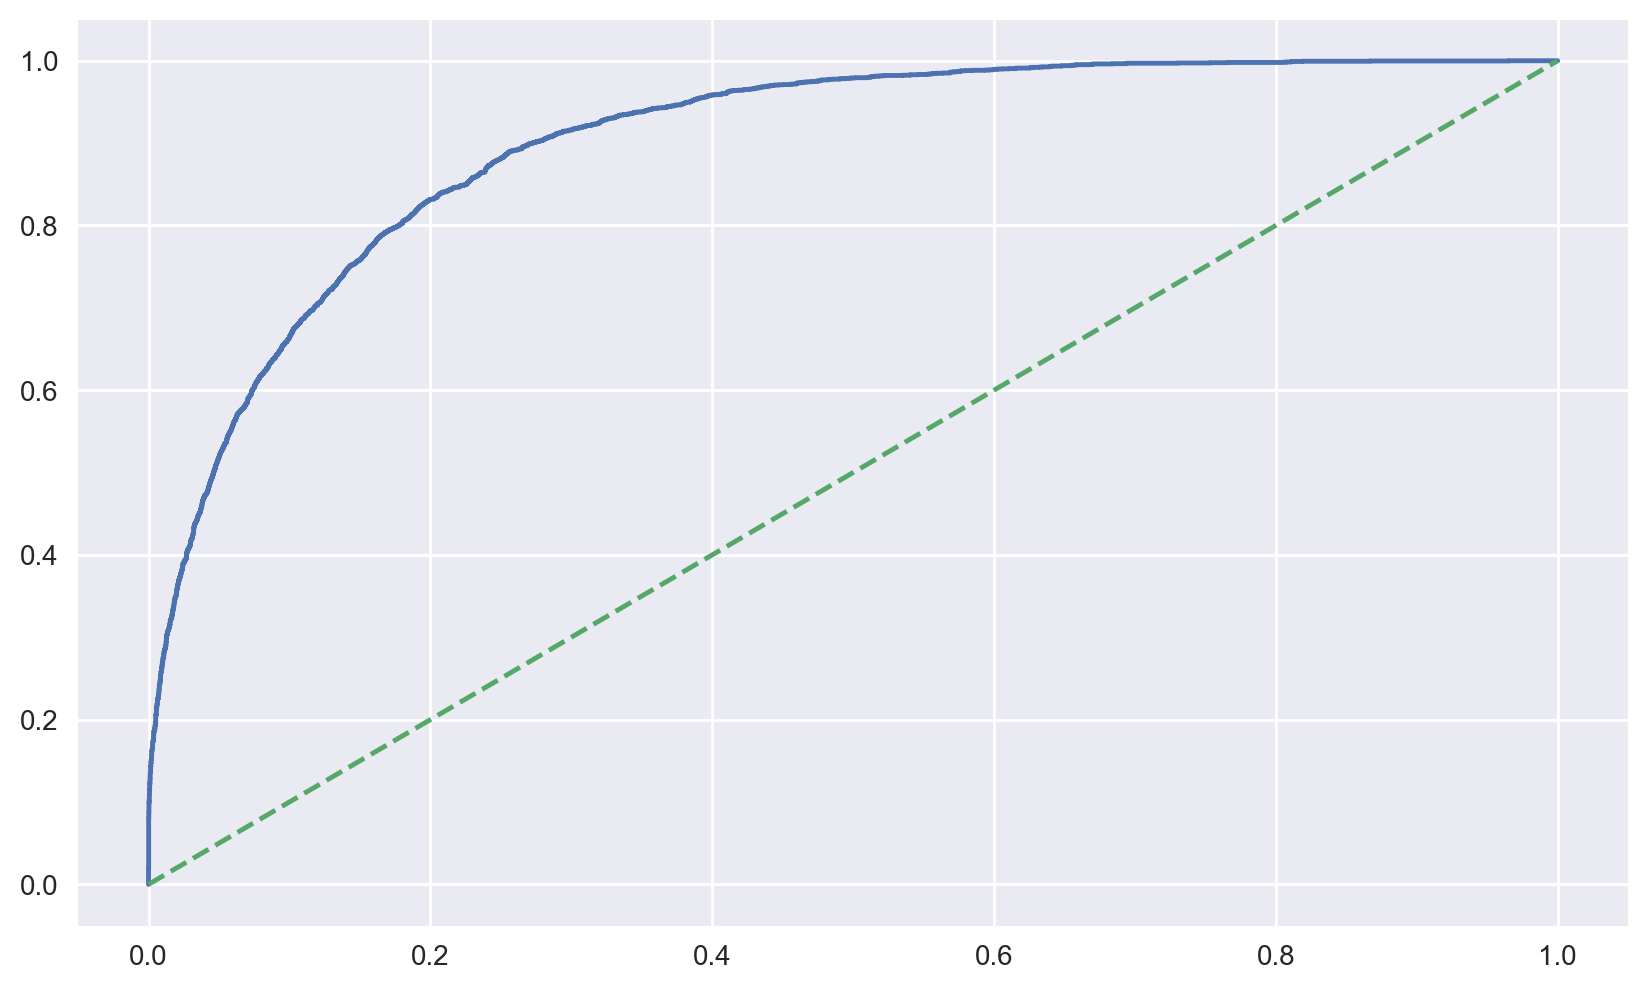

In [166]:
# Curva Receiver Operator Characteristic (ROC)
false_positive, true_positive, thres =  roc_curve(y1_test,yhat_pr1)
plt.plot(false_positive,true_positive)
plt.plot([0,1],ls='--')

In [177]:
round(roc_auc_score(y1_test,yhat_pr1),2)
print(f"Con un valor de 90%, nuestro modelo tiene un desempeyo de {(0.9-0.5)*100}% superior a un mecanismo de clasificación aleatoria")

Con un valor de 90%, nuestro modelo tiene un desempeyo de 40.0% superior a un mecanismo de clasificación aleatoria
